<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/3_Aprendizaje_Supervisado_Clasificacion_Tumoresferas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
#### **Práctico de Aprendizaje_Supervisado**



Importamos las librerías necesarias:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")


En este práctico, utilizaremos el archivo original *fiji_datos_0al7mo_labels.csv* que se encuentra en la carpeta *data/raw/*.

Además sumaremos los siguientes datos sintéticos que se encuentran en la carpeta *data/datos_sinteticos/*:
  * datos_sinteticos_dias_3_y_5.csv
  * synthetic_3y5_sint2.csv
  * synthetic_data_dia_3_si.csv
  * synthetic_data_dia_4_si.csv
  * synthetic_data_dia_5_si.csv

Como también dos archivos extras que están en la capeta *data/03_AS/*:
  * fiji_datos_mean_diam.csv
  * fiji_datos_noise.csv
  

### Regresión


1.   Utilizando del día 1 al 5 los datos clasificados como 'Esferoide' = 'si', realizar un ajuste del diámetro medio. Sean los datos reales *mean_diam_df* y la señal ruidosa *df_noise*.


In [ ]:
mean_diam_df = pd.read_csv("data/03_AS/fiji_datos_mean_diam.csv")
mean_diam_df

,dia,mean
0,0,23.145003
1,1,31.781506
2,2,60.685558
3,3,101.092311
4,4,89.688273
5,5,110.212304


In [ ]:
df_noise = pd.read_csv("data/03_AS/fiji_datos_noise.csv")
#df_noise

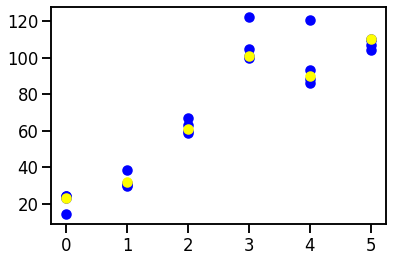

In [ ]:
X_noise = df_noise['dia']
y_noise = df_noise['mean']
X_noise = np.array(X_noise.to_list())
y_noise = np.array(y_noise.to_list())

X_mean = mean_diam_df['dia']
y_mean = mean_diam_df['mean']
X_mean = np.array(X_mean.to_list())
y_mean = np.array(y_mean.to_list())


plt.scatter(X_noise, y_noise, color="blue", label="noise")
plt.scatter(X_mean, y_mean, color="yellow", label="mean")
plt.show()

Probar un ajuste lineal, polinomial, probar el ajuste "óptimo" que da el menor error cuadrático y sobreajuste.  

### Clasificación

Aquí vamos a usar el dataset sin modificar, que se encuentra en 'raw/fiji_datos_0al7mo_labels.csv', en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link).

1) Teniendo en cuenta la naturaleza de nuestros datos, es adecuado plantearlo como un problema supervisado? De qué tipo? Justificar.
   
2) El dataset que tenemos, es linealmente separable?

2) Enumerar los pasos para generar un modelo de aprendizaje supervisado.  

3) El paso de estándarización/normalización es necesario para todos los algoritmos de clasificación? Enumere en cuales no.

4) Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link):

5) Generar los siguientes dataframes por separado:

  * Tomar todo el dataset. Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

  * Realizar clasificación con solo los datos del día 3, 4 y 5. Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

  * Tomar solo los días 3,4 y 5 y sumar los datos sintéticos. Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.
  
  * Realizar eliminación de outliers por día y y por etiqueta. Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

  * Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5) pero indicar cuál se tomó.

\
**Elegir uno**, agregar columnas preprocesadas al original. Probar algún clasificador lineal como también DT, Random Forest, XGBoost.

Separen en conjuntos de entrenamiento, test y validación, explorar con parámetros de defecto (modelo baseline) y con búsqueda de hiperparámetros y por medio de las diferentes métricas determinar cuál es el mejor algoritmo de clasificación.

Sobre el mejor, probar si mejora o empeoran las métricas probando los demás escenarios.
  
Recordar eliminar una de las columnas altamente correlacionadas y también aquellas que no suman al problema. Si hubiera una columna constante, también deberían excluirla.

En los algoritmos que lo permitan, hacer listado de importancia de features.

Tenemos pocos datos, es muy posible que se genere overfitting. Cómo podrían tratar de solventar este inconveniente? Implementar si es posible.

\
OPCIONAL:

Para evitar la pérdida de datos excesiva por eliminación de outliers se puede usar el método de imputación de máximos por el percentil 99, buscar 'capping'.
Además pueden sumar columnas que sean combinaciones/modificaciones de columnas, multiplicaciones, logaritmos, potencias..

Si se animan, tenemos 5 días. Probar clasificación multiclase para identificar a q día se corresponden las muestras. O tomar solo los 3 que usaron en los algoritmos anteriores.

Super buenas prácticas en este [repositorio](https://github.com/daianadte/wids-cba-2023/), es muy instructivo chusmear sobre todo el archivo  ['06_FinalModel.ipynb'](https://github.com/daianadte/wids-cba-2023/blob/main/06_FinalModel.ipynb) solo para que vean un análisis posterior a implementar los modelos y que existen los Shap Values, que es una técnica utilizada para explicar las predicciones.



----
Como este es el último práctico, si se animan, podrían implementar clústering.
Pueden implementar kmeans sobre el dataset normalizado, usando PCA, o incluso animarse a probar t-SNE y UMAP (perdiendo interpretabilidad con estos últimos.)

Muchas veces en problemas de negocios, no es importante el modelo en sí, qué tan bien separa los datos sino la interpretabilidad que se puede dar a los resultados. Podríamos coordinar con Luciano para charlar si lo que encontraron a partir de las agrupaciones, es coherente o no, sería como parte de charlar con el "cliente" a ver si está de acuerdo a lo hallado. O sea, pueden encontrar explicaciones a los datos distintos que la de "esferoides".

In [ ]:
# capping por el percentil 90
def outliers_capping(df, col, percentil_sup = 0.9):
    q_cap = df[col].quantile(percentil_sup)
    print('q_cap', q_cap)
    df.loc[df[col] > q_cap, col] = q_cap

In [ ]:
# Cargamos nuestro dataset:
import pandas as pd
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos = pd.read_csv(url)
fiji_datos.shape

(1018, 24)

In [ ]:
# exploramos los datos estadísticos de una variable, recuerden que deberían filtrar por día, filtrar si es esferoide o no, esto es solo para mostrar un ejemplo.
fiji_datos['Area'].describe(percentiles = [0.25,0.75,0.90,0.95])

count     1018.000000
mean      1948.874361
std       3366.692373
min        100.148400
25%        460.590400
50%        781.803800
75%       1570.761125
90%       4601.012350
95%       9453.411100
max      22735.999500
Name: Area, dtype: float64

In [ ]:
# Aplicamos capping a la variable elegida:
outliers_capping(fiji_datos, 'Area', percentil_sup = 0.9)

q_cap 4601.012350000004


In [ ]:
# exploramos como cambiaron los valores estadísticos y vemos que el máximo se corresponde con el percentil 90 anterior:
fiji_datos['Area'].describe(percentiles = [0.25,0.75,0.90,0.95])


count    1018.000000
mean     1358.304315
std      1364.016520
min       100.148400
25%       460.590400
50%       781.803800
75%      1570.761125
90%      4590.545215
95%      4601.012350
max      4601.012350
Name: Area, dtype: float64